In [2]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [3]:
(X_train, y_train), (X_test, y_test) = \
                reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(8982,)

In [5]:
X_test.shape

(2246,)

In [6]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(8982, 46)

In [10]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [14]:
h = model.fit(X_train, y_train, epochs=200, batch_size=20,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.1990 - accuracy: 0.4446 - val_loss: 1.8418 - val_accuracy: 0.5298
Epoch 2/200
450/450 [==============================] - 19s 42ms/step - loss: 1.7804 - accuracy: 0.5493 - val_loss: 1.7306 - val_accuracy: 0.5779
Epoch 3/200
450/450 [==============================] - 19s 42ms/step - loss: 1.6175 - accuracy: 0.5880 - val_loss: 1.6335 - val_accuracy: 0.5886
Epoch 4/200
450/450 [==============================] - 19s 42ms/step - loss: 1.4435 - accuracy: 0.6384 - val_loss: 1.4312 - val_accuracy: 0.6411
Epoch 5/200
450/450 [==============================] - 19s 42ms/step - loss: 1.2916 - accuracy: 0.6736 - val_loss: 1.3733 - val_accuracy: 0.6523
Epoch 6/200
450/450 [==============================] - 19s 42ms/step - loss: 1.1870 - accuracy: 0.6974 - val_loss: 1.2548 - val_accuracy: 0.6790
Epoch 7/200
450/450 [==============================] - 19s 42ms/step - loss: 1.0719 - accuracy: 0.7267 - val_loss: 1.1904 - val_ac

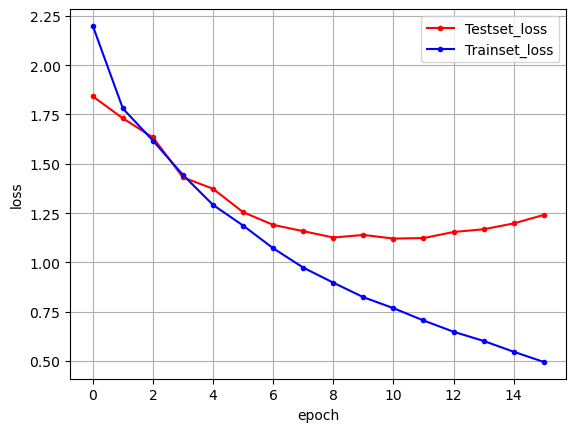

In [15]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()